In [15]:
import pathlib
import matplotlib.pyplot as plt

hist_dict = {}
for method in ['random', 'pca', 'cosine']:
    for path in pathlib.Path(f'save/feat_select_{method}/').rglob('*.txt'):
        hist_len = int(str(path.parent.parent).split('_')[-1])
        with open(path) as f:
            lines = f.readlines()
            if method not in hist_dict:
                hist_dict[method] = {}
            if hist_len not in hist_dict[method]:
                hist_dict[method][hist_len] = {'rmse': [], 'mae': [], 'norm_rmse': [], 'norm_mae': [], 'crps': []}
            hist_dict[method][hist_len]['rmse'].append(float(lines[0].split()[-1]))
            hist_dict[method][hist_len]['mae'].append(float(lines[1].split()[-1]))
            hist_dict[method][hist_len]['norm_rmse'].append(float(lines[2].split()[-1]))
            hist_dict[method][hist_len]['norm_mae'].append(float(lines[3].split()[-1]))
            hist_dict[method][hist_len]['crps'].append(float(lines[4].split()[-1]))
print(hist_dict)

{'random': {16: {'rmse': [19.95180889158971, 36.62079052671269, 1.8112661047575032, 4.9174334268652755, 2.9801786372589003, 4.340688842667908, 3.165110896462138, 6.023968114395243, 24.54590929824525], 'mae': [13.241501342216038, 23.594356728471034, 1.238781262750495, 2.9305130422931827, 2.1164873724114406, 3.170427818820901, 2.2340493398169947, 4.061895222424372, 16.80524378388984], 'norm_rmse': [0.2176117143343645, 0.156204847666131, 0.15584560432158936, 0.15134136245423932, 0.09703938787255767, 0.08519855838719052, 0.15289024962555972, 0.20806816243407492, 0.16826092279702626], 'norm_mae': [0.14442328230975426, 0.10064099368439418, 0.10658765818974743, 0.09019092119992052, 0.06891621356685412, 0.062228808119961114, 0.10791544827152061, 0.1402980747832555, 0.11519906945424536], 'crps': [0.07448145590330425, 0.024223820159309788, 0.025508833558935868, 0.021036704904154727, 0.04606940871790836, 0.01522351252405267, 0.0050802952364871375, 0.03531855972189652, 0.028385043144226074]}, 32: 

In [16]:
# dict cleaning
for method, method_v in hist_dict.items():
    for hist_len, hist_len_v in method_v.items():
        for metric, metric_v in hist_len_v.items():
            hist_dict[method][hist_len][metric] = [x for x in metric_v if x < 1e10]
print(hist_dict)

{'random': {16: {'rmse': [19.95180889158971, 36.62079052671269, 1.8112661047575032, 4.9174334268652755, 2.9801786372589003, 4.340688842667908, 3.165110896462138, 6.023968114395243, 24.54590929824525], 'mae': [13.241501342216038, 23.594356728471034, 1.238781262750495, 2.9305130422931827, 2.1164873724114406, 3.170427818820901, 2.2340493398169947, 4.061895222424372, 16.80524378388984], 'norm_rmse': [0.2176117143343645, 0.156204847666131, 0.15584560432158936, 0.15134136245423932, 0.09703938787255767, 0.08519855838719052, 0.15289024962555972, 0.20806816243407492, 0.16826092279702626], 'norm_mae': [0.14442328230975426, 0.10064099368439418, 0.10658765818974743, 0.09019092119992052, 0.06891621356685412, 0.062228808119961114, 0.10791544827152061, 0.1402980747832555, 0.11519906945424536], 'crps': [0.07448145590330425, 0.024223820159309788, 0.025508833558935868, 0.021036704904154727, 0.04606940871790836, 0.01522351252405267, 0.0050802952364871375, 0.03531855972189652, 0.028385043144226074]}, 32: 

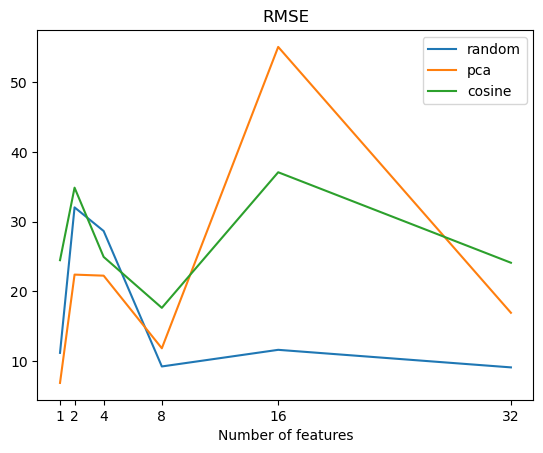

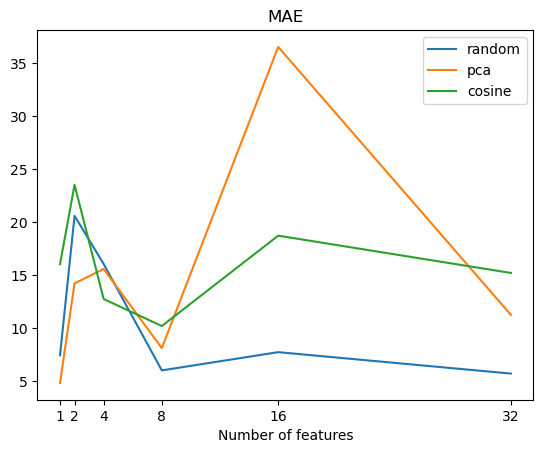

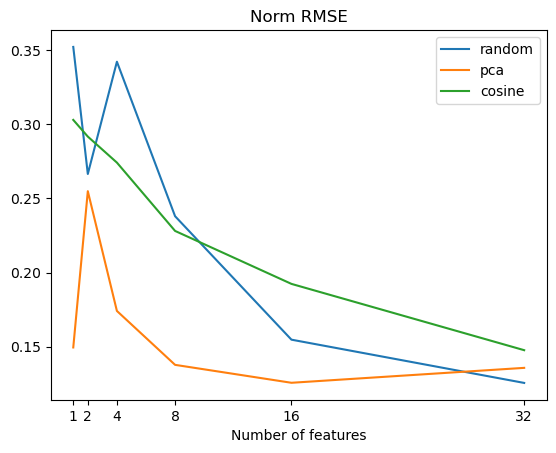

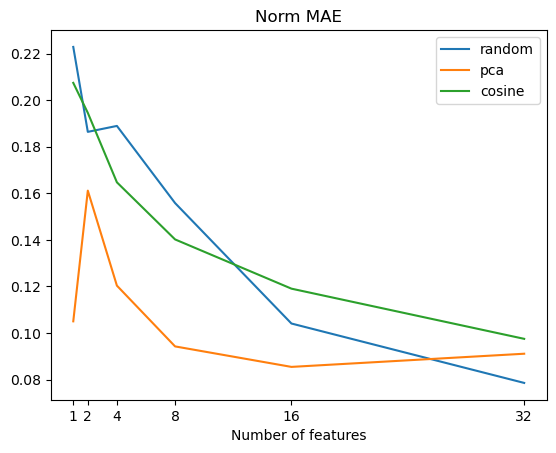

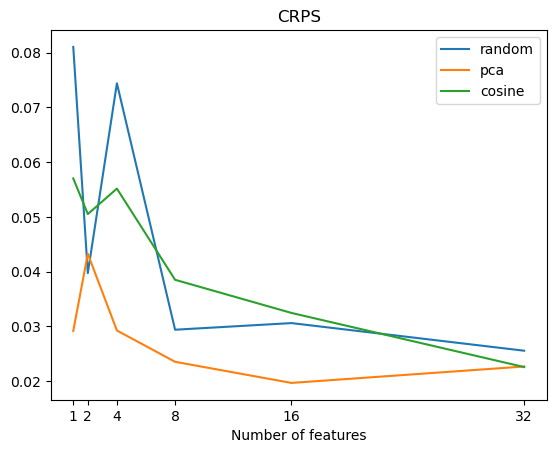

In [17]:
plotting_dict = {}
for method in ['random', 'pca', 'cosine']:
    len_accmlr = []
    rmse_accmlr = []
    mae_accmlr = []
    norm_rmse_accmlr = []
    norm_mae_accmlr = []
    crps_accmlr = []

    for k,v in sorted(hist_dict[method].items(), key=lambda x: int(x[0])):
        len_accmlr.append(k)
        rmse_accmlr.append(sum(v['rmse'])/len(v['rmse']))
        mae_accmlr.append(sum(v['mae'])/len(v['mae']))
        norm_rmse_accmlr.append(sum(v['norm_rmse'])/len(v['norm_rmse']))
        norm_mae_accmlr.append(sum(v['norm_mae'])/len(v['norm_mae']))
        if len(v['crps']) == 0:
            crps_accmlr.append(0)
        else:
            crps_accmlr.append(sum(v['crps'])/len(v['crps']))
    
    plotting_dict[method] = (len_accmlr, rmse_accmlr, mae_accmlr, norm_rmse_accmlr, norm_mae_accmlr, crps_accmlr)

for i, metric in enumerate(['RMSE', 'MAE', 'Norm RMSE', 'Norm MAE', 'CRPS']):
    fig, ax = plt.subplots()
    for method in plotting_dict.keys():
        len_accmlr, metric_accmlr = plotting_dict[method][0], plotting_dict[method][i+1]
        ax.plot(len_accmlr, metric_accmlr, label=method)
    ax.set_title(metric)
    ax.set_xlabel('Number of features')
    ax.legend()
    ax.set_xticks(len_accmlr)
    plt.show()

        